<h1>✅ Example 1: Simple Linear Data (Logistic Regression works great)</h1>

Linear Dataset Results:
Logistic Regression Accuracy: 0.96
Linear SVM Accuracy: 0.99


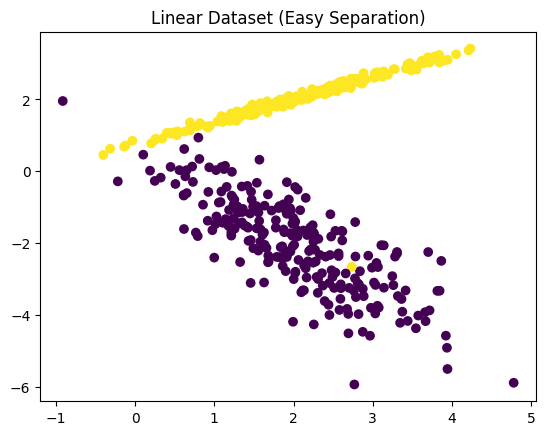

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 1) Create easy LINEAR dataset
X, y = make_classification(
    n_samples=500,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    class_sep=2.0,
    random_state=42
)

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# Linear SVM
svm_linear = SVC(kernel="linear")
svm_linear.fit(X_train, y_train)
svm_pred = svm_linear.predict(X_test)

print("Linear Dataset Results:")
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print("Linear SVM Accuracy:", accuracy_score(y_test, svm_pred))

# Plot dataset
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Linear Dataset (Easy Separation)")
plt.show()


<h1>✅ Example 2: Non-linear Data (SVM wins!)

Now we create circle-type data.</h1>


Non-Linear Dataset Results:
Logistic Regression Accuracy: 0.3
SVM (RBF Kernel) Accuracy: 1.0


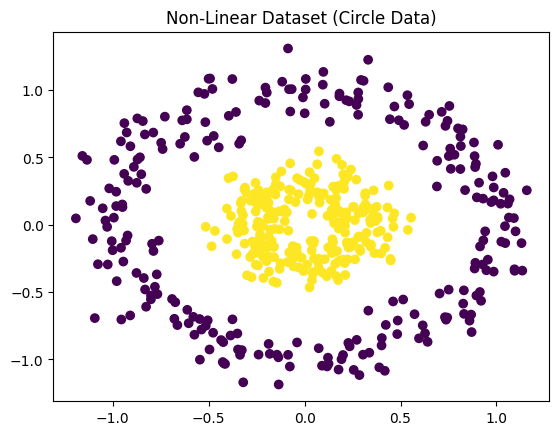

In [7]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 2) Create NON-LINEAR dataset (circles)
X, y = make_circles(n_samples=500, noise=0.1, factor=0.3, random_state=42)

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression (fails for non-linear)
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# SVM with RBF Kernel (best for non-linear)
svm_rbf = SVC(kernel="rbf", gamma="scale")
svm_rbf.fit(X_train, y_train)
svm_pred = svm_rbf.predict(X_test)

print("\nNon-Linear Dataset Results:")
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print("SVM (RBF Kernel) Accuracy:", accuracy_score(y_test, svm_pred))

# Plot dataset
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Non-Linear Dataset (Circle Data)")
plt.show()


<h1>Code Example: SVM without scaling vs with scaling</h1>

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

# Create dataset with different feature ranges
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0,
                           n_informative=2, random_state=42)

# Make feature 2 very large range to simulate "salary"
X[:, 1] = X[:, 1] * 1000

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ 1) SVM WITHOUT scaling
svm_no_scaling = SVC(kernel="rbf", gamma="scale")
svm_no_scaling.fit(X_train, y_train)
pred1 = svm_no_scaling.predict(X_test)

print("Accuracy WITHOUT Scaling:", accuracy_score(y_test, pred1))

# ✅ 2) SVM WITH scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_scaling = SVC(kernel="rbf", gamma="scale")
svm_scaling.fit(X_train_scaled, y_train)
pred2 = svm_scaling.predict(X_test_scaled)

print("Accuracy WITH Scaling:", accuracy_score(y_test, pred2))


Accuracy WITHOUT Scaling: 0.88
Accuracy WITH Scaling: 0.9


<h1>Pip Line</h1>

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

model = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf", gamma="scale"))
])

model.fit(X_train, y_train)
pred = model.predict(X_test)
